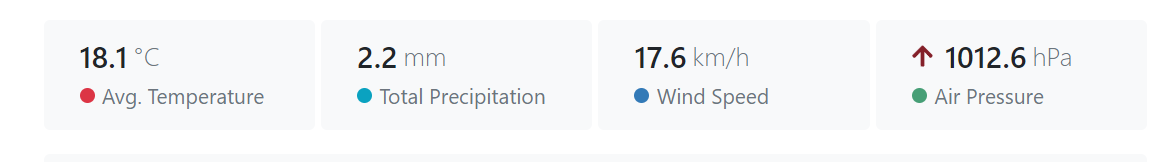

In [1]:
from meteostat import Stations
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd

stations = Stations()
stations = stations.region('JO')

print('Stations:', stations.count())

Stations: 22


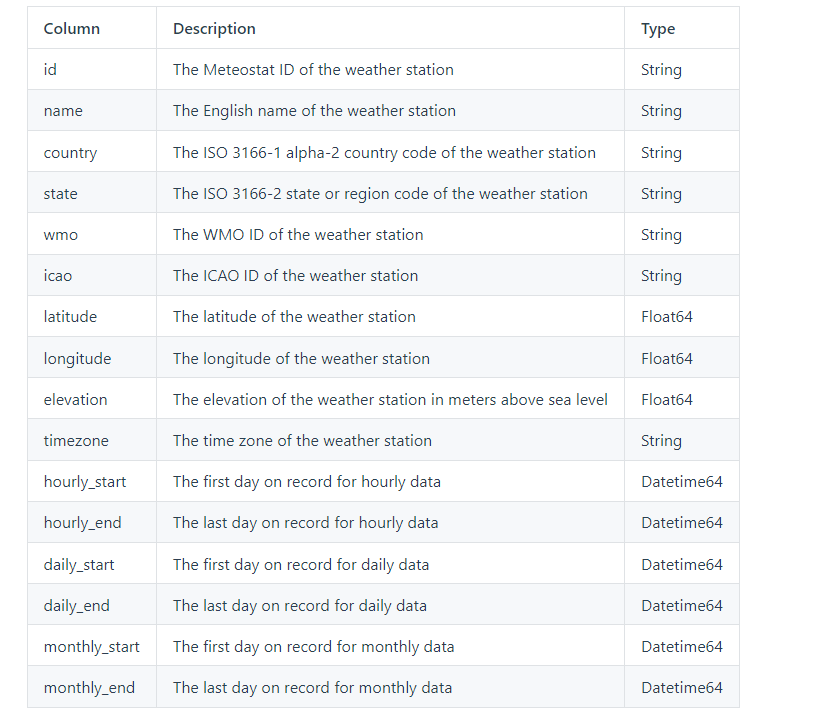

In [2]:
stations = stations._data.drop(columns = ["monthly_start","monthly_end"]).dropna()
stations

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end
id,,,,,,,,,,,,,
40250,H-4'Irwaished,JO,MF,40250,OJHR,32.5000,38.2000,686.0,Asia/Amman,1963-01-17,2023-04-04,1963-01-20,2020-04-02
40260,H-5'Safawi,JO,MF,40260,OJHF,32.2000,37.1333,668.0,Asia/Amman,1964-01-13,2024-04-30,1964-01-29,2024-05-09
40265,Mafraq,JO,MF,40265,OJMF,32.3667,36.2500,686.0,Asia/Amman,1953-03-01,2024-04-30,1953-12-01,2024-05-11
40270,Amman Airport,JO,AM,40270,OJAM,31.9833,35.9833,767.0,Asia/Amman,1949-03-01,2024-05-14,1974-12-07,2022-04-25
40272,Queen Alia Airport,JO,AM,40272,OJAI,31.6667,35.9667,721.0,Asia/Amman,1983-07-01,2024-05-14,1986-04-28,2022-04-25
40310,Ma'An,JO,MN,40310,OJMN,30.1667,35.7833,1069.0,Asia/Amman,1961-07-01,2024-04-30,1963-01-20,2024-05-11
40340,Aqaba Airport,JO,MN,40340,OJAQ,29.6333,35.0167,53.0,Asia/Amman,1961-07-01,2024-05-14,1999-02-20,2022-04-25


In [3]:
stations.to_csv("stations_info.csv",index=False)

In [4]:
all_stations = pd.DataFrame([],columns = ['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres', 'City'])

for row in stations.iterrows():
   
        # Set time period
    start = datetime(1999, 1, 1)
    end = datetime(2025, 12, 31)

    # Create Point for Vancouver, BC
    vancouver = Point(row[1][5]	, row[1][6])

    # Get daily data for 2018
    data = Daily(vancouver, start, end)
    data = data.fetch()

    data = data.drop(columns = ["prcp","snow","wpgt","tsun"])
    data["City"] = row[1][0]

    all_stations = pd.concat([data,all_stations],axis = 0)



all_stations["date"] = list(all_stations.index)
all_stations.reset_index(drop = True,inplace=True)

In [5]:
all_stations

,tavg,tmin,tmax,wdir,wspd,pres,City,date
0,18.0,15.3,22.4,NaN,NaN,NaN,Aqaba Airport,1999-01-01
1,17.9,12.0,23.8,NaN,NaN,NaN,Aqaba Airport,1999-01-02
2,18.3,11.4,24.0,NaN,NaN,NaN,Aqaba Airport,1999-01-03
3,17.9,14.6,22.0,NaN,NaN,NaN,Aqaba Airport,1999-01-04
4,18.2,12.7,21.2,NaN,NaN,NaN,Aqaba Airport,1999-01-05
...,...,...,...,...,...,...,...,...
64917,28.8,18.5,37.6,295.0,8.7,1007.1,H-4'Irwaished,2024-05-19
64918,29.5,20.5,37.5,314.0,10.2,1005.7,H-4'Irwaished,2024-05-20
64919,30.0,19.6,38.1,297.0,11.1,1006.1,H-4'Irwaished,2024-05-21
64920,29.7,20.0,38.5,254.0,10.6,1006.2,H-4'Irwaished,2024-05-22


In [6]:
df = all_stations.copy()
df

,tavg,tmin,tmax,wdir,wspd,pres,City,date
0,18.0,15.3,22.4,NaN,NaN,NaN,Aqaba Airport,1999-01-01
1,17.9,12.0,23.8,NaN,NaN,NaN,Aqaba Airport,1999-01-02
2,18.3,11.4,24.0,NaN,NaN,NaN,Aqaba Airport,1999-01-03
3,17.9,14.6,22.0,NaN,NaN,NaN,Aqaba Airport,1999-01-04
4,18.2,12.7,21.2,NaN,NaN,NaN,Aqaba Airport,1999-01-05
...,...,...,...,...,...,...,...,...
64917,28.8,18.5,37.6,295.0,8.7,1007.1,H-4'Irwaished,2024-05-19
64918,29.5,20.5,37.5,314.0,10.2,1005.7,H-4'Irwaished,2024-05-20
64919,30.0,19.6,38.1,297.0,11.1,1006.1,H-4'Irwaished,2024-05-21
64920,29.7,20.0,38.5,254.0,10.6,1006.2,H-4'Irwaished,2024-05-22


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class DateTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['year'] = X['date'].dt.year
        X['month'] = X['date'].dt.month
        X['day'] = X['date'].dt.day
        X['day_of_week'] = X['date'].dt.dayofweek
        return X[['year', 'month', 'day', 'day_of_week']]

date_pipeline = Pipeline([
    ('date_transformer', DateTransformer())
])

# Define pipeline for one-hot encoding City
city_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('date_pipeline', date_pipeline, ['date']),
    ('city_pipeline', city_pipeline, ['City'])
])

# Fit and transform the data
transformed_data = preprocessor.fit_transform(df)


columns = ['year', 'month', 'day', 'day_of_week'] + preprocessor.transformers_[1][1]['one_hot_encoder'].get_feature_names_out(['City']).tolist()
transformed_df = pd.DataFrame(transformed_data, columns=columns)

# Combine transformed features with original DataFrame
df_full = pd.concat([transformed_df, df], axis=1)
df_full

,year,month,day,day_of_week,City_Amman Airport,City_Aqaba Airport,City_H-4'Irwaished,City_H-5'Safawi,City_Ma'An,City_Mafraq,City_Queen Alia Airport,tavg,tmin,tmax,wdir,wspd,pres,City,date
0,1999.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,15.3,22.4,NaN,NaN,NaN,Aqaba Airport,1999-01-01
1,1999.0,1.0,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.9,12.0,23.8,NaN,NaN,NaN,Aqaba Airport,1999-01-02
2,1999.0,1.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.3,11.4,24.0,NaN,NaN,NaN,Aqaba Airport,1999-01-03
3,1999.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.9,14.6,22.0,NaN,NaN,NaN,Aqaba Airport,1999-01-04
4,1999.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.2,12.7,21.2,NaN,NaN,NaN,Aqaba Airport,1999-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64917,2024.0,5.0,19.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28.8,18.5,37.6,295.0,8.7,1007.1,H-4'Irwaished,2024-05-19
64918,2024.0,5.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.5,20.5,37.5,314.0,10.2,1005.7,H-4'Irwaished,2024-05-20
64919,2024.0,5.0,21.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,19.6,38.1,297.0,11.1,1006.1,H-4'Irwaished,2024-05-21
64920,2024.0,5.0,22.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.7,20.0,38.5,254.0,10.6,1006.2,H-4'Irwaished,2024-05-22


In [8]:
import joblib

# Assuming preprocessor is your fitted preprocessor
# Fit the preprocessor to your data
transformed_data = preprocessor.fit_transform(df)

# Save the fitted preprocessor using joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [10]:
import joblib

# Load the preprocessor
preprocessor = joblib.load('preprocessor.pkl')


In [11]:
preprocessor

ColumnTransformer(transformers=[('date_pipeline',
                                 Pipeline(steps=[('date_transformer',
                                                  DateTransformer())]),
                                 ['date']),
                                ('city_pipeline',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['City'])])

In [111]:
d_test = pd.DataFrame([["Aqaba Airport","1999-01-01"]],columns=["City","date"])
d_test["date"] = pd.to_datetime(d_test["date"])

preprocessor.transform(d_test)

array([[1.999e+03, 1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime


In [13]:
df = all_stations.copy()
df = df.dropna()

X = preprocessor.transform(df.drop(columns = ['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']))
y = df["pres"]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)


In [14]:
import joblib


pred_list = ["tavg","wdir","wspd","pres"]

dict_model = dict()

for i in pred_list:


    model = RandomForestRegressor()

    model.fit(X,df[i])

    dict_model[f"{i}_model"] = model

    joblib.dump(model, f'{i}_model.pkl')



In [15]:
all_stations["City"].value_counts().index

Index(['Ma'An', 'Amman Airport', 'Mafraq', 'H-5'Safawi', 'H-4'Irwaished',
       'Aqaba Airport', 'Queen Alia Airport'],
      dtype='object')

In [16]:
d_test = pd.DataFrame([["Queen Alia Airport","2024-05-14"]],columns=["City","date"])
d_test["date"] = pd.to_datetime(d_test["date"])

preprocessor.transform(d_test)

array([[2.024e+03, 5.000e+00, 1.400e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]])

In [17]:
dict_model["tavg_model"].predict(preprocessor.transform(d_test))

array([17.442])

In [18]:
dict_model["wspd_model"].predict(preprocessor.transform(d_test))

array([14.716])